# 1번

   Tumor counts: A cancer laboratory is estimating the rate of tumorigenesis
in two strains of mice, A and B.  
They have tumor count data for 10 mice
in strain A and 13 mice in strain B.  
Type A mice have been well studied,
and information from other laboratories suggests that type A mice have
tumor counts that are approximately Poisson-distributed with a mean of
12. Tumor count rates for type B mice are unknown, but type B mice are
related to type A mice. The observed tumor counts for the two populations
are  
yA = (12, 9, 12, 14, 13, 13, 15, 8, 15, 6);  
yB = (11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7).  

$ \theta_A \sim gamma(120,10), \theta_B \sim gamma(12,1), p(\theta_A, \theta_B) = p(\theta_A)\times p(\theta_B) $

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as st
from scipy.stats import gamma
from scipy.stats import nbinom

$f(x \mid \theta)$ = $\frac{e^{-\theta} \theta^x}{ x!}$

In [3]:
#theta 와 무관한 x!은 정의할 필요 없음
# 가능도 구하는 함수 생성하기
def likelihood(theta, n, sy): # n 개의 sample 에 대한 likelihood
    return (theta**sy)*np.exp(-n*theta)

### posterior

In [4]:
# prior parameters for thetaA ~ gamma(a,b)
a1 = 120
b1 = 10
prior1 = st.gamma(a1, scale= 1/b1)

# data in group A and posterior distribution
# n=number of mice, sy=sum of their numbers
nA = 10 
syA = 117
postA = st.gamma(a1+syA, scale=1/(b1+nA))

In [5]:
# prior parameters for thetaB ~ gamma(a,b)
a2 = 12
b2 = 1
prior2 = st.gamma(a2, scale= 1/b2)

# data in group B and posterior distribution
nB = 13
syB = 113
postB = st.gamma(a2+syB, scale=1/(b2+nB))

- Group A Bayesian Analysis

In [6]:
# posterior mean (Group A)
(a1+syA)/(b1+nA)

11.85

In [7]:
# posterior mode (Group A) 
(a1+syA-1)/(b1+nA)

11.8

In [8]:
# posterior 95% CI (Group A)
# upper and lower bounds
lbA=gamma.ppf(0.025, a1+syA, scale=1/(b1+nA))
ubA=gamma.ppf(0.975, a1+syA, scale=1/(b1+nA))
(lbA, ubA)

(10.389238190941795, 13.405448325642006)

In [13]:
len(thetas)

300

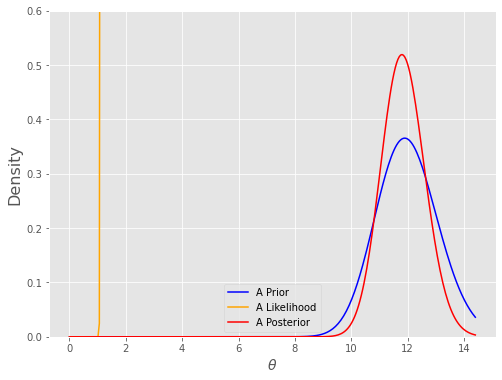

In [16]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior1.pdf(thetas), label='A Prior', c='blue')
plt.plot(thetas, likelihood(thetas, nA, syA), label='A Likelihood', c='orange')


plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.ylim([0, 0.6])
plt.legend();

- Group B Bayesian Analysis

In [9]:
# posterior mean (Group B)
(a2+syB)/(b2+nB)

8.928571428571429

In [10]:
# posterior mode (Group B)
(a2+syB-1)/(b2+nB)

8.857142857142858

In [11]:
# posterior 95% CI (Group B)
# upper and lower bounds
lbB=gamma.ppf(0.025, a2+syB, scale=1/(b2+nB))
ubB=gamma.ppf(0.975, a2+syB, scale=1/(b2+nB))
(lbB,ubB)

(7.432064219464302, 10.560308149242363)

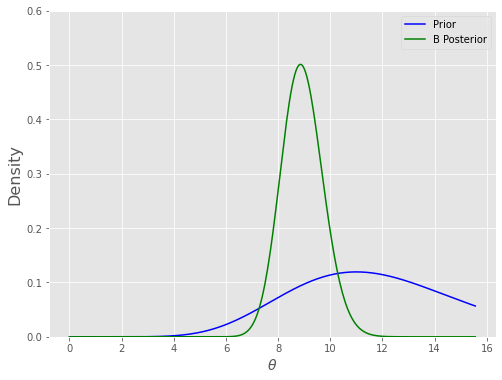

In [16]:
thetas = np.linspace(0.001, ubB+5, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior2.pdf(thetas), label='Prior', c='blue')

plt.plot(thetas, postB.pdf(thetas), label='B Posterior', color='green')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.ylim([0, 0.6])
plt.legend();

- 두 사후 확률을 비교해보자!

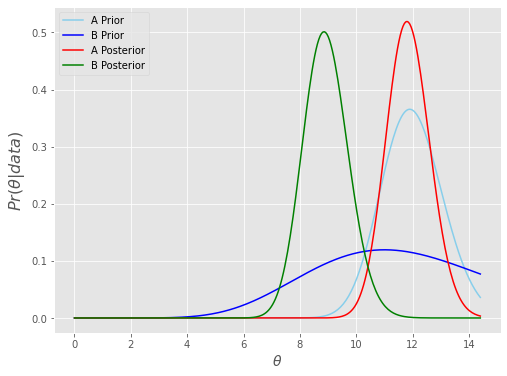

In [13]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior1.pdf(thetas), label='A Prior', c='skyblue')
plt.plot(thetas, prior2.pdf(thetas), label='B Prior', c='blue')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', c='green')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$Pr(\theta|data)$', fontsize=16)
plt.legend();

### b)

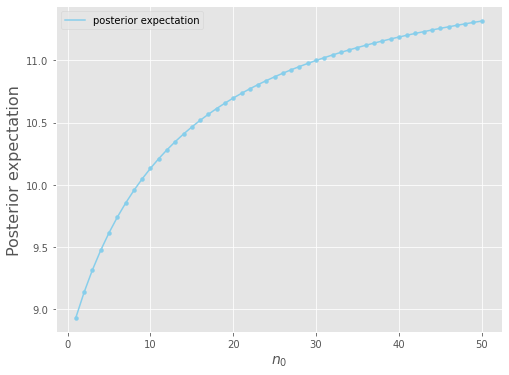

In [14]:
nzeros = np.linspace(1, 50, 50)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(nzeros, (12*nzeros+syB)/(nzeros+nB), label='posterior expectation', c='skyblue')
plt.scatter(nzeros, (12*nzeros+syB)/(nzeros+nB), c='skyblue', s=15)
plt.xlabel(r'$n_{0}$', fontsize=14)
plt.ylabel("Posterior expectation", fontsize=16)
plt.legend();

- nzero가 커짐에 따라 theta 가 12에 가까워진다. 

- B의 평균이 A의 평균보다 작으므로 더 강한 prior를 주어야 theatA의 posterior expectation과 근접할 수 있음
-  nzero 값이  50에 가까워질수록 thetaA의 posterior mean과 가까워진다.

## c)

평균이 같다는 정보 뿐이고 B 의 Prior 믿음의 정도가 약하므로 독립으로 봐도 무방하다

# 2,3번

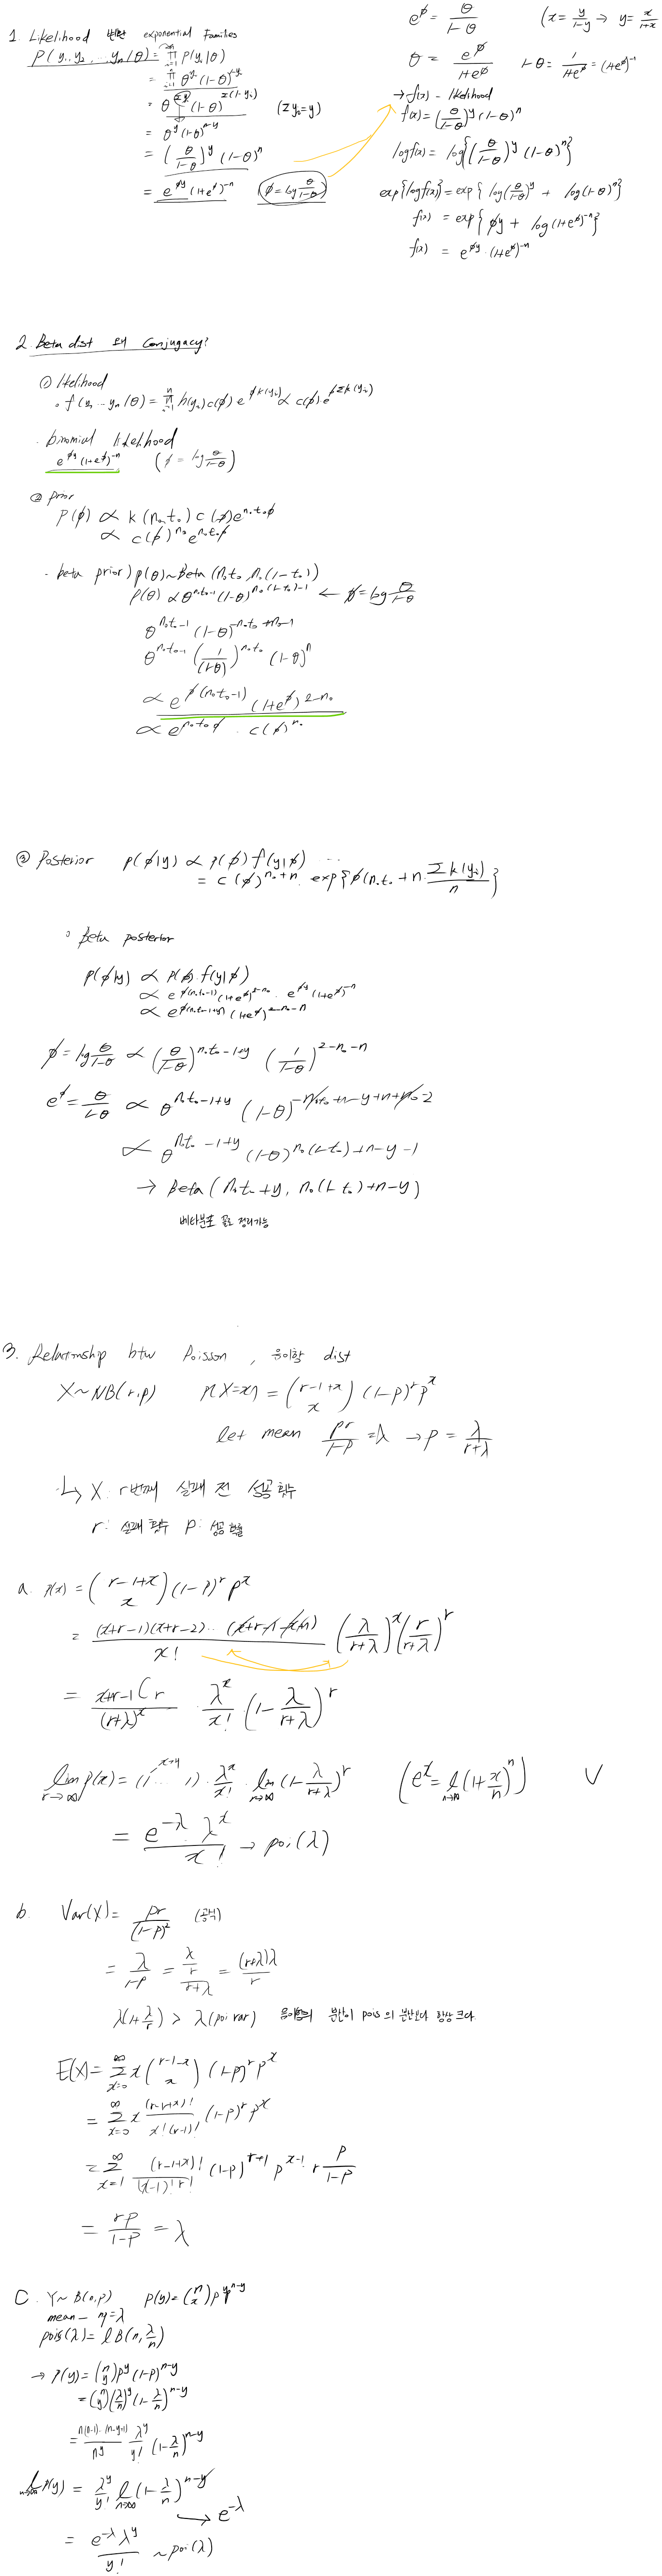

- 이항분포와 음이항분포 모두 포아송을 극한분포로 갖는 것을 확인할 수 있었다

- 포아송은 분산과 평균이 동일한 단일 parameter 를 가져 분산이 커지는 문제가 발생한다.
- 반면 음이항 분포는 두 개의 parameter를 가지므로 비교적 유동적으로 모델링 할 수 있다.